 ## Task-1: Data Cleaning and Data Preprocessing

In [2]:
import pandas as pd

In [10]:
# Loading the dataset
df = pd.read_csv('/Users/sanjayarepally/Desktop/coursera/untitled folder/games_dataset.csv')  # Replace with the actual file path
df.head()

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719
1,Control,Puzzle,Nintendo Switch,2000,3.457386
2,Among Us,Strategy,Nintendo Switch,2007,5.367622
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325
4,League of Legends,Simulation,PC,2021,3.535476


In [12]:
# Checking for missing values
print(df.isnull().sum())

Game Name       0
Genre           0
Platform        0
Release Year    0
User Rating     0
dtype: int64


In [14]:
# Check for data types and anomalies
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Game Name     5000 non-null   object 
 1   Genre         5000 non-null   object 
 2   Platform      5000 non-null   object 
 3   Release Year  5000 non-null   int64  
 4   User Rating   5000 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 195.4+ KB
None
       Release Year  User Rating
count   5000.000000  5000.000000
mean    2011.375400     5.524913
std        6.943984     2.598429
min     2000.000000     1.005878
25%     2005.000000     3.260596
50%     2011.000000     5.574233
75%     2017.000000     7.802727
max     2023.000000     9.996196


In [22]:
# Droping rows with missing user ratings
df = df.dropna(subset=['User Rating'])

In [24]:
# Filling the missing genre or platform with 'Unknown'
df['Genre'] = df['Genre'].fillna('Unknown')
df['Platform'] = df['Platform'].fillna('Unknown')

In [26]:
# Converting to consistent case and strip spaces
df['Genre'] = df['Genre'].str.strip().str.title()
df['Platform'] = df['Platform'].str.strip().str.upper()

In [28]:
# Ensuring 'Release Year' is numeric
df['Release Year'] = pd.to_numeric(df['Release Year'], errors='coerce')


In [30]:
# Droping rows with invalid years
df = df.dropna(subset=['Release Year'])

In [32]:
# Creating 'Decade'
df['Decade'] = (df['Release Year'] // 10 * 10).astype(int)

## Task-2:Exploratory Data Analysis (EDA)

In [44]:
#Step 1: Analyze Trends in Game Sales by Genre, Platform, and Release Year

In [54]:
import matplotlib.pyplot as plt

In [56]:
import seaborn as sns

In [58]:
# Total sales by genre
genre_sales = df.groupby('Genre')['Global Sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', figsize=(10, 5), title='Total Global Sales by Genre')
plt.ylabel('Sales (Millions)')
plt.show()

# Sales trend over time
sales_trend = df.groupby('Release Year')['Global Sales'].sum()
sales_trend.plot(kind='line', figsize=(10, 5), title='Global Sales Over Years')
plt.ylabel('Sales (Millions)')
plt.xlabel('Release Year')
plt.show()

# Sales by platform
platform_sales = df.groupby('Platform')['Global Sales'].sum().sort_values(ascending=False).head(10)
platform_sales.plot(kind='bar', figsize=(10, 5), title='Top 10 Platforms by Global Sales')
plt.ylabel('Sales (Millions)')
plt.show()


KeyError: 'Column not found: Global Sales'

In [60]:
#Step 2: Visualize Distribution of User Ratings by Genre and Platform

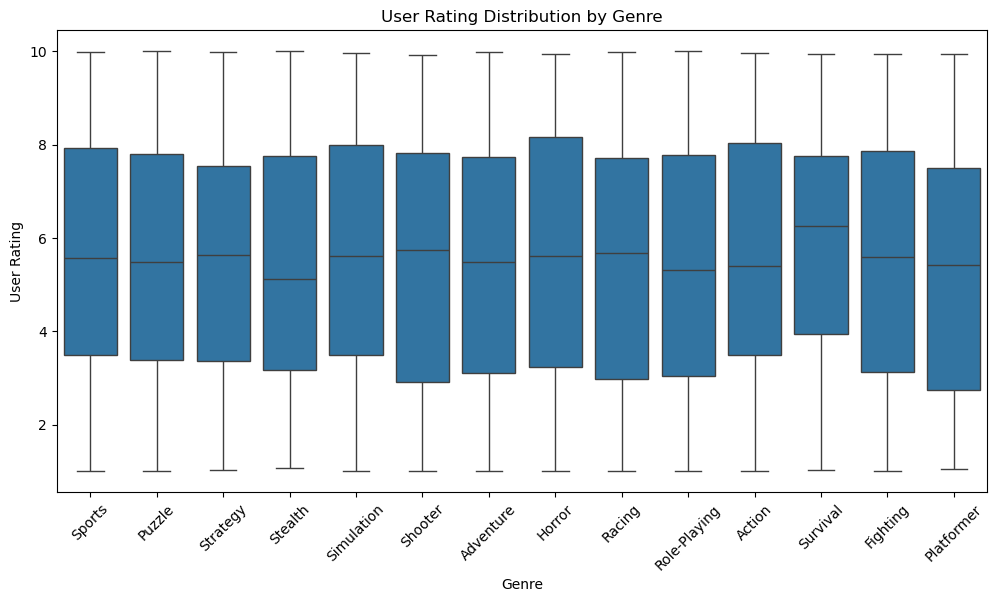

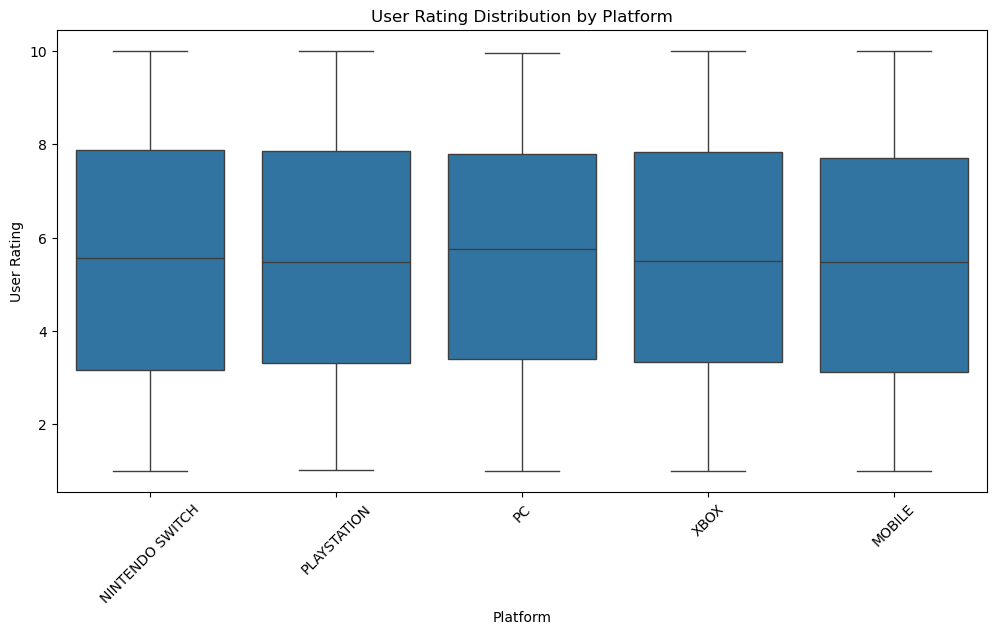

In [62]:
# Ratings by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='User Rating', data=df)
plt.xticks(rotation=45)
plt.title('User Rating Distribution by Genre')
plt.show()

# Ratings by platform
plt.figure(figsize=(12, 6))
sns.boxplot(x='Platform', y='User Rating', data=df)
plt.xticks(rotation=45)
plt.title('User Rating Distribution by Platform')
plt.show()


In [64]:
# Step 3: Identify Top 5 Genres and Platforms by Average User Rating

In [76]:
# Top 5 genres
top_genres = df.groupby('Genre')['User Rating'].mean().sort_values(ascending=False).head(5)
top_5_genres=print("Top 5 Genres by Average User Rating:\n", top_genres)
display(top_5_genres)

Top 5 Genres by Average User Rating:
 Genre
Survival      5.831934
Horror        5.629845
Simulation    5.626343
Action        5.603556
Sports        5.561171
Name: User Rating, dtype: float64


None

In [78]:
# Top 5 platforms
top_platforms = df.groupby('Platform')['User Rating'].mean().sort_values(ascending=False).head(5)
top_5_platform=print("Top 5 Platforms by Average User Rating:\n", top_platforms)
display(top_5_platform)


Top 5 Platforms by Average User Rating:
 Platform
PC                 5.599444
XBOX               5.531032
PLAYSTATION        5.523658
NINTENDO SWITCH    5.523076
MOBILE             5.441895
Name: User Rating, dtype: float64


None

## Task 3: Advanced Analysis

In [84]:
#Step 1: Time Series Analysis of Game Releases and User Ratings

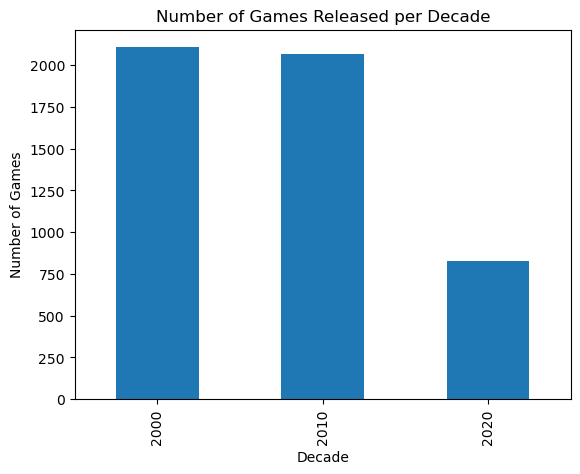

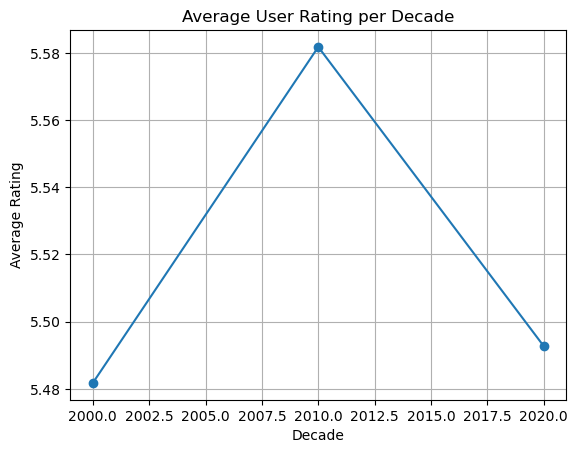

In [86]:
# Number of games released per decade
release_counts = df['Decade'].value_counts().sort_index()
release_counts.plot(kind='bar', title='Number of Games Released per Decade')
plt.ylabel('Number of Games')
plt.xlabel('Decade')
plt.show()

# Average user rating per decade
avg_rating_decade = df.groupby('Decade')['User Rating'].mean()
avg_rating_decade.plot(kind='line', marker='o', title='Average User Rating per Decade')
plt.ylabel('Average Rating')
plt.xlabel('Decade')
plt.grid(True)
plt.show()


In [88]:
#Step 2: Hypothesis Testing – Are Ratings Different Across Platforms?

In [90]:
from scipy.stats import f_oneway

# Filter top 3 platforms for clarity (or more if you want)
top_platforms = df['Platform'].value_counts().head(3).index
filtered_df = df[df['Platform'].isin(top_platforms)]

# Group ratings per platform
ratings_by_platform = [group['User Rating'].values for name, group in filtered_df.groupby('Platform')]

# ANOVA test
stat, pval = f_oneway(*ratings_by_platform)
print("ANOVA test results:")
print("F-statistic:", stat)
print("P-value:", pval)

if pval < 0.05:
    print("✅ Significant difference in user ratings between platforms.")
else:
    print("❌ No significant difference in user ratings between platforms.")


ANOVA test results:
F-statistic: 0.27028114755438126
P-value: 0.7631831731958536
❌ No significant difference in user ratings between platforms.


In [92]:
#Step 3: Correlation Analysis Between Features and User Ratings

In [94]:
# Only use numeric columns
correlation = df.corr(numeric_only=True)
user_rating_corr = correlation['User Rating'].sort_values(ascending=False)

print("Correlation with User Rating:\n", user_rating_corr)


Correlation with User Rating:
 User Rating     1.000000
Decade          0.006851
Release Year    0.000177
Name: User Rating, dtype: float64


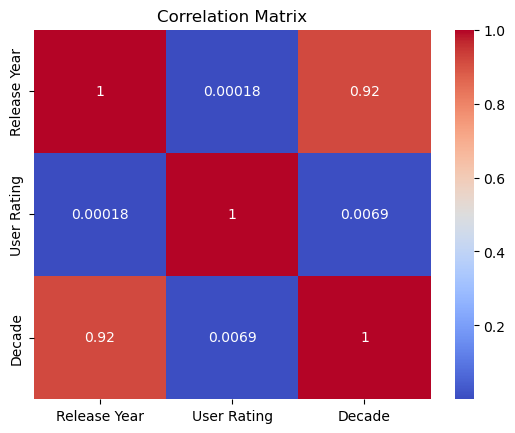

In [96]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Task 4: Machine Learning – Predicting Game Ratings

In [103]:
#Step 1: Prepare the Dataset for Modeling

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
features = ['Genre', 'Platform', 'Release Year']
target = 'User Rating'

X = df[features]
y = df[target]

# Handle categorical variables using OneHotEncoding
categorical_features = ['Genre', 'Platform']
numerical_features = ['Release Year']

# Create column transformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the pipeline with a Random Forest model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Platform'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [107]:
#Step 2: Evaluate the Model

In [109]:
# Predict and evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 8.48
R-squared Score: -0.26


In [111]:
#Step 3: Feature Importance (from Random Forest)

In [113]:
# Get feature names from OneHotEncoder
encoder = model.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = encoder.get_feature_names_out(categorical_features)
feature_names = list(encoded_cat_features) + numerical_features

# Get feature importances
importances = model.named_steps['regressor'].feature_importances_

# Top influential features
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top Influential Features in Predicting Ratings:\n", feature_importance_df.head(10))


Top Influential Features in Predicting Ratings:
                      Feature  Importance
19              Release Year    0.413562
18             Platform_XBOX    0.049167
15  Platform_NINTENDO SWITCH    0.048108
17      Platform_PLAYSTATION    0.043976
14           Platform_MOBILE    0.043266
16               Platform_PC    0.042072
8              Genre_Shooter    0.029407
1            Genre_Adventure    0.028985
11             Genre_Stealth    0.028405
6               Genre_Racing    0.027271


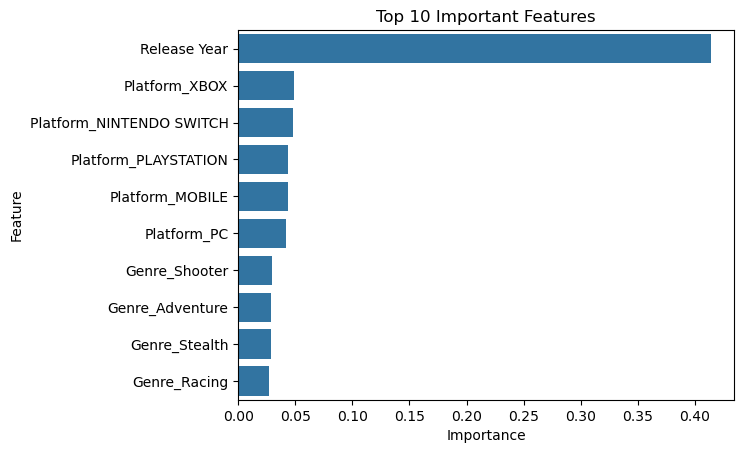

In [115]:
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Important Features')
plt.show()
